# Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sn

# Importing the dataset

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

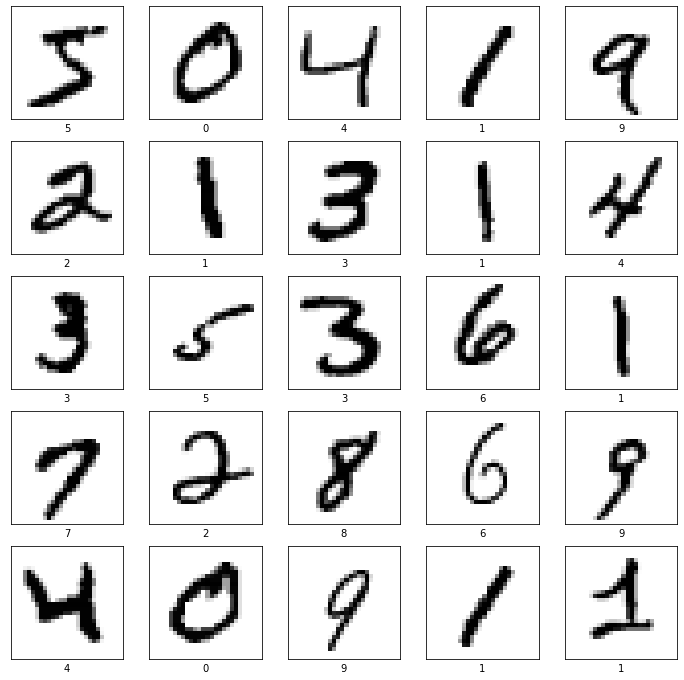

In [3]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
X_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


In [5]:
# normalization

X_train = X_train / X_train.max()

X_test = X_test / X_test.max()

# Defining the model

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
epochs=10
history=model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2753 - accuracy: 0.9209 - val_loss: 0.1472 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.9637 - val_loss: 0.1032 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0839 - accuracy: 0.9753 - val_loss: 0.0902 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0637 - accuracy: 0.9806 - val_loss: 0.0762 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0494 - accuracy: 0.9850 - val_loss: 0.0803 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0774 - val_accuracy:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# Analysis of bias–variance tradeoff

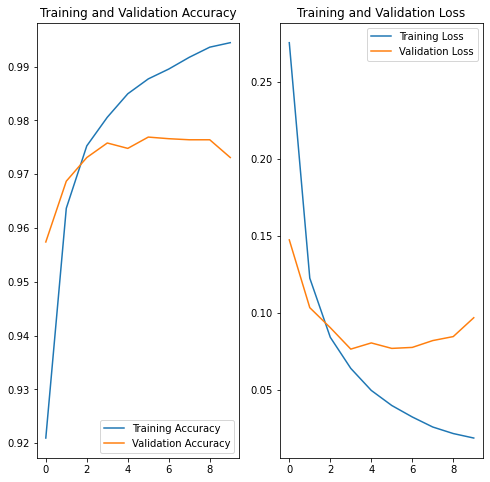

In [9]:
# https://www.tensorflow.org/tutorials/images/classification

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Confusion matrix

Text(69.0, 0.5, 'Actual')

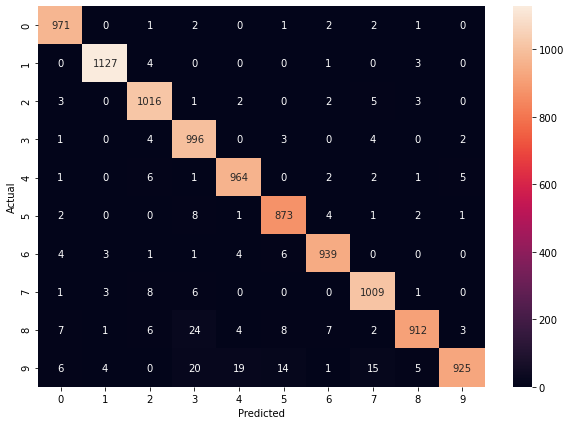

In [10]:
# https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_recognition_neural_network.ipynb

y_hat = model.predict(X_test)
y_hat_labels = [np.argmax(i) for i in y_hat]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_hat_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Model accuray and loss for the test set

In [11]:
print('Model loss for test set = ',model.evaluate(X_test,y_test)[0])
print('Model lossaccurqcy for test set = ',model.evaluate(X_test,y_test)[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9731
Model loss for test set =  0.09662511199712753
313/313 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9731
Model lossaccurqcy for test set =  0.9731000065803528


# Probing model's performance on some of the test set

In [12]:
 # https://www.tensorflow.org/tutorials/keras/classification

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [13]:
class_names=['zero','one','two','three','four','five','six','seven','eight','nine']

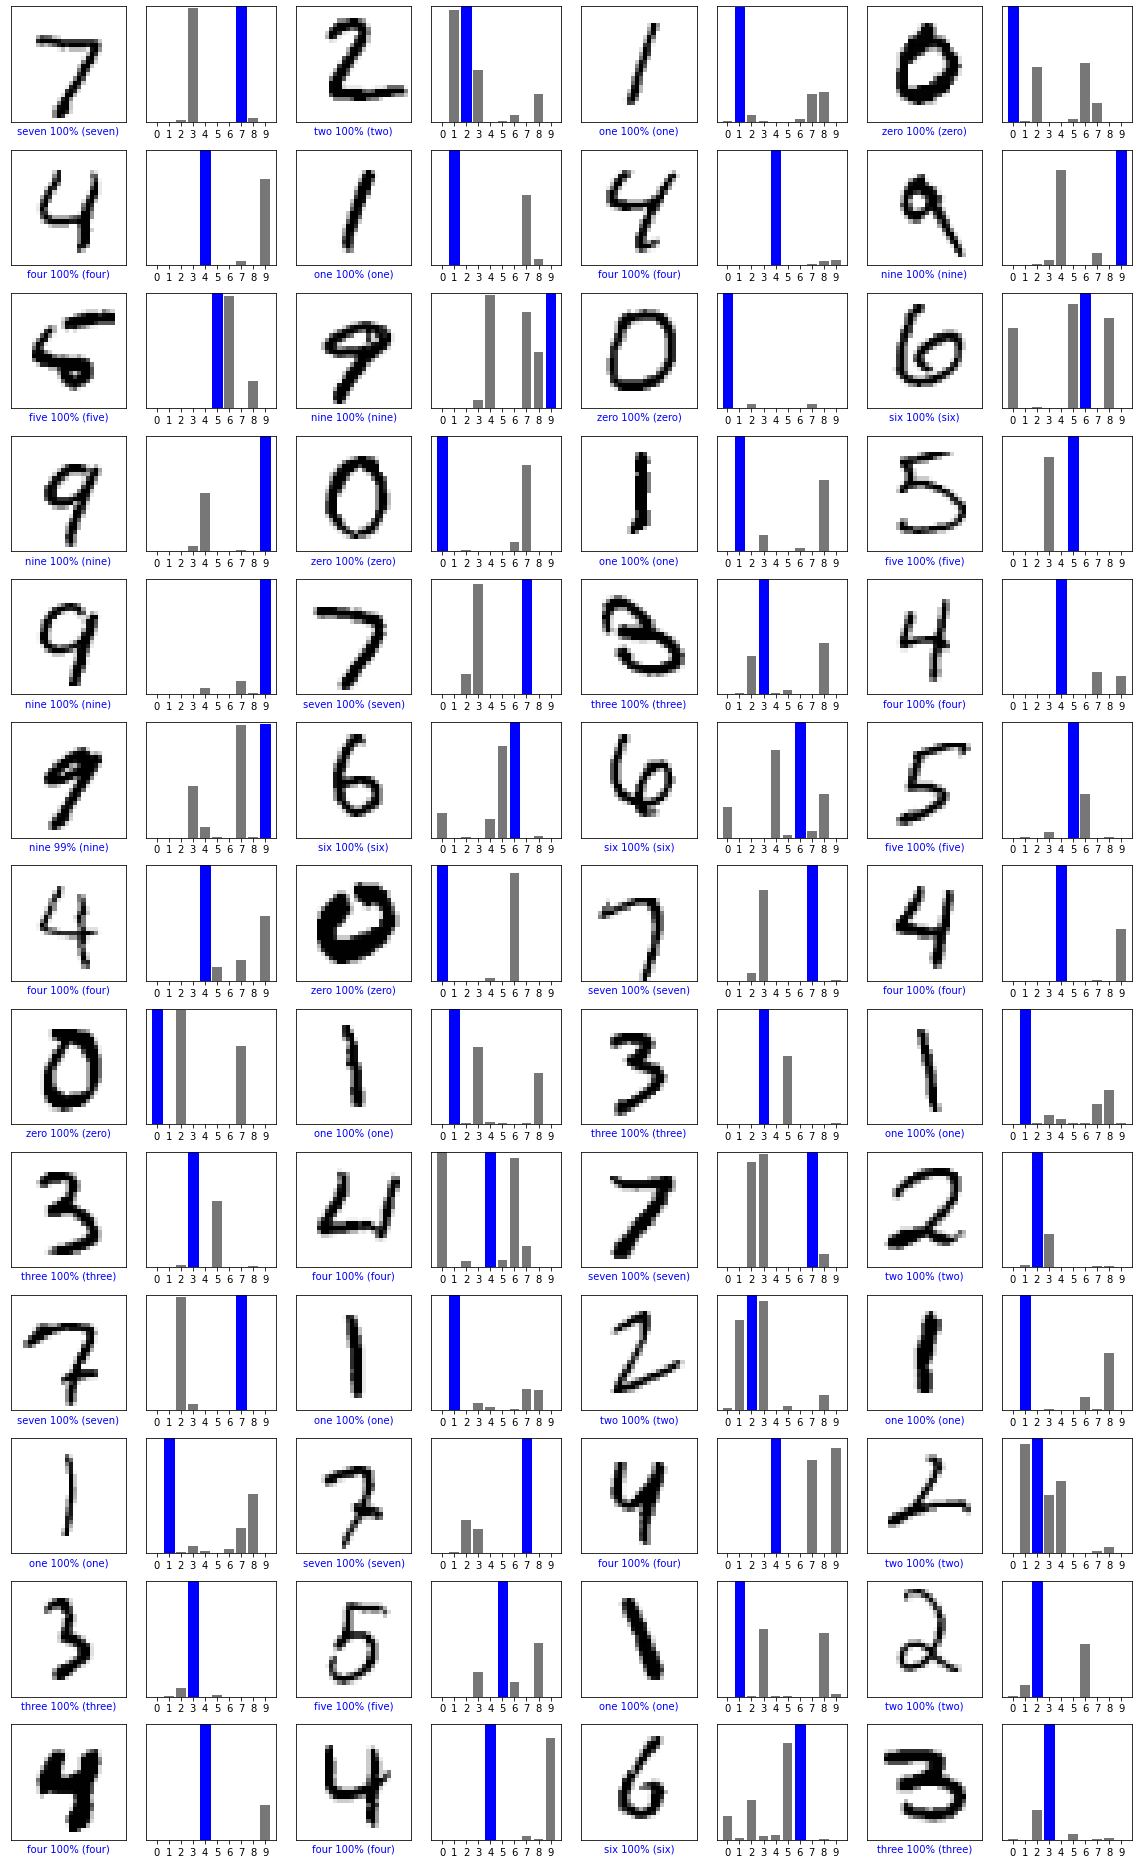

In [15]:
# https://www.tensorflow.org/tutorials/keras/classification
# Predicted labels are written at the bottom of each image, out of paranthesis.
# Correct prediction labels are blue and incorrect prediction labels are red. 
# The number after the predicted label gives the percentage (out of 100) for the predicted label.
# The label written in paranthesis is the correct label.

num_rows = 13
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_hat[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_hat[i], y_test)
plt.tight_layout()
plt.show()